## Challenge: model comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [18]:
import pandas as pd
import numpy as np
import scipy
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Data source: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
Description: This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [2]:
data_path = (r'C:\Users\katec\Thinkful\data_collections\iris_data.csv')
iris_df = pd.read_csv(data_path)

In [3]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df['species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

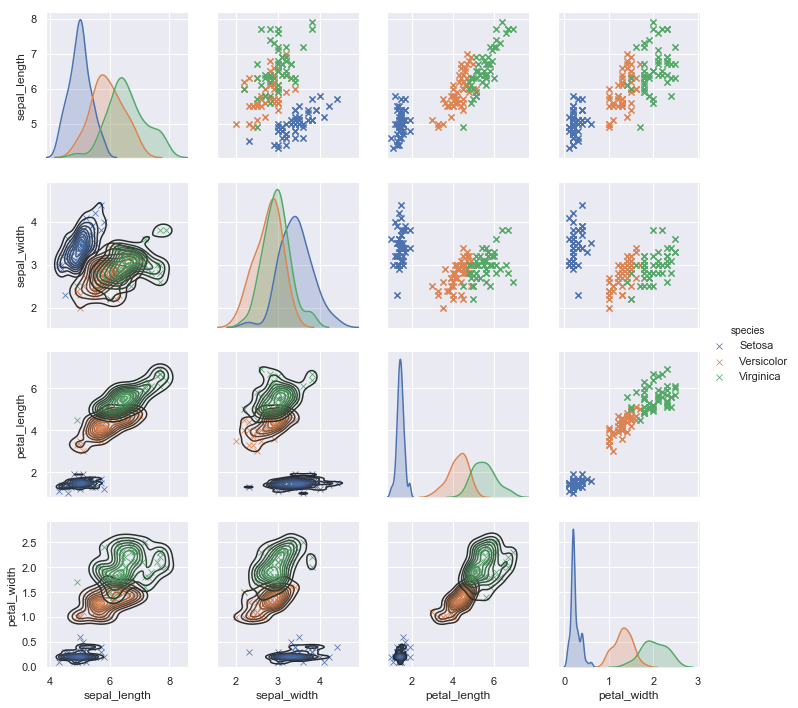

In [9]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8.7,6.27)})

snsdata = iris_df
g = sns.pairplot(snsdata, hue='species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

No missing data. Data is not normally distributed. 
Species is a categorical value. Use OHC in order to use species as target value. 

In [10]:
iris_df = pd.concat([iris_df, pd.get_dummies(iris_df['species'], prefix='species', drop_first=True)], axis=1)

In [11]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_Versicolor,species_Virginica
0,5.1,3.5,1.4,0.2,Setosa,0,0
1,4.9,3.0,1.4,0.2,Setosa,0,0
2,4.7,3.2,1.3,0.2,Setosa,0,0
3,4.6,3.1,1.5,0.2,Setosa,0,0
4,5.0,3.6,1.4,0.2,Setosa,0,0


### OLS regression model

In [12]:
Y = iris_df['species_Versicolor']

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 
             'petal_width']]

#split with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [13]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)


R_sq_train = lrm.score(X_train, y_train)
R_sq_test = lrm.score(X_test, y_test)
MAE = mean_absolute_error(y_test, y_preds_test)
MSE = mse(y_test, y_preds_test)
RMSE = rmse(y_test, y_preds_test)
MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('R-squared of the model in the training set is: {}'.format(R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(MAE))
print('Mean squared error of the prediction is: {}'.format(MSE))
print('Root mean squared error of the prediction is: {}'.format(RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(MAPE))

R-squared of the model in the training set is: 0.31073283364974325
-----Test set statistics-----
R-squared of the model in the test set is: 0.032572480841248974
Mean absolute error of the prediction is: 0.4174565976912532
Mean squared error of the prediction is: 0.22465816833797655
Root mean squared error of the prediction is: 0.4739811898567037
Mean absolute percentage error of the prediction is: inf


In [14]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5) 
lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

lcv_R_sq_train = lasso_cv.score(X_train, y_train)
lcv_R_sq_test = lasso_cv.score(X_test, y_test)
lcv_MAE = mean_absolute_error(y_test, y_preds_test)
lcv_MSE = mse(y_test, y_preds_test)
lcv_RMSE = rmse(y_test, y_preds_test)
lcv_MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('Best alpha value is: {}'.format(lasso_cv.alpha_))
print('R-squared of the model in the training set is: {}'.format(lcv_R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(lcv_R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(lcv_MAE))
print('Mean squared error of the prediction is: {}'.format(lcv_MSE))
print('Root mean squared error of the prediction is: {}'.format(lcv_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(lcv_MAPE))

Best alpha value is: 0.0001
R-squared of the model in the training set is: 0.31072888602437954
-----Test set statistics-----
R-squared of the model in the test set is: 0.033897142612416165
Mean absolute error of the prediction is: 0.4172705173749471
Mean squared error of the prediction is: 0.2243505524377833
Root mean squared error of the prediction is: 0.47365657647475273
Mean absolute percentage error of the prediction is: inf


In [15]:
from sklearn.linear_model import RidgeCV

# As alpha gets larger, parameter shrinkage grows more pronounced.
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)



rcv_R_sq_train = lasso_cv.score(X_train, y_train)
rcv_R_sq_test = lasso_cv.score(X_test, y_test)
rcv_MAE = mean_absolute_error(y_test, y_preds_test)
rcv_MSE = mse(y_test, y_preds_test)
rcv_RMSE = rmse(y_test, y_preds_test)
rcv_MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('Best alpha value is: {}'.format(ridge_cv.alpha_))
print('R-squared of the model in the training set is: {}'.format(rcv_R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(rcv_R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(rcv_MAE))
print('Mean squared error of the prediction is: {}'.format(rcv_MSE))
print('Root mean squared error of the prediction is: {}'.format(rcv_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(rcv_MAPE))

Best alpha value is: 0.1
R-squared of the model in the training set is: 0.31072888602437954
-----Test set statistics-----
R-squared of the model in the test set is: 0.033897142612416165
Mean absolute error of the prediction is: 0.41711291173255133
Mean squared error of the prediction is: 0.22380624003965358
Root mean squared error of the prediction is: 0.4730816420446407
Mean absolute percentage error of the prediction is: inf


In [16]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(alphas=alphas, cv=5) 
elastic_cv.fit(X_train, y_train)

# predictions 
y_preds_train = elastic_cv.predict(X_train)
y_preds_test = elastic_cv.predict(X_test)


ecv_R_sq_train = lasso_cv.score(X_train, y_train)
ecv_R_sq_test = lasso_cv.score(X_test, y_test)
ecv_MAE = mean_absolute_error(y_test, y_preds_test)
ecv_MSE = mse(y_test, y_preds_test)
ecv_RMSE = rmse(y_test, y_preds_test)
ecv_MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('Best alpha value is: {}'.format(elastic_cv.alpha_))
print('R-squared of the model in the training set is: {}'.format(ecv_R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(ecv_R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(ecv_MAE))
print('Mean squared error of the prediction is: {}'.format(ecv_MSE))
print('Root mean squared error of the prediction is: {}'.format(ecv_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(ecv_MAPE))

Best alpha value is: 0.001
R-squared of the model in the training set is: 0.31072888602437954
-----Test set statistics-----
R-squared of the model in the test set is: 0.033897142612416165
Mean absolute error of the prediction is: 0.4163328708268811
Mean squared error of the prediction is: 0.22268061504889236
Root mean squared error of the prediction is: 0.47189046933466705
Mean absolute percentage error of the prediction is: inf


In [17]:
data = {'R_sq_train':[R_sq_train, lcv_R_sq_train, rcv_R_sq_train, ecv_R_sq_train], 'R_sq_test':[R_sq_test, lcv_R_sq_test, rcv_R_sq_test, ecv_R_sq_test],
       'MAE': [MAE, lcv_MAE, rcv_MAE, ecv_MAE ], 'MSE': [MSE, lcv_MSE, rcv_MSE, ecv_MSE], 'RMSE': [RMSE, lcv_RMSE, rcv_RMSE, ecv_RMSE],
       'MAPE': [MAPE, lcv_MAPE, rcv_MAPE, ecv_MAPE]} 
  
# Creates pandas DataFrame. 
model_stats_compare = pd.DataFrame(data, index =['lrm', 'lcv', 'rcv', 'ecv']) 
  
# print the data 
model_stats_compare 

,R_sq_train,R_sq_test,MAE,MSE,RMSE,MAPE
lrm,0.310733,0.032572,0.417457,0.224658,0.473981,inf
lcv,0.310729,0.033897,0.417271,0.224351,0.473657,inf
rcv,0.310729,0.033897,0.417113,0.223806,0.473082,inf
ecv,0.310729,0.033897,0.416333,0.222681,0.471890,inf


From the above stastics, it appears that the ECV regression model is performing the best with the highest R-sq values and the lower MAE, MSE, and RMSE values. 

### KNN regression model
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 
             'petal_width']]
Y = iris_df['species_Versicolor']

In [28]:
from sklearn.model_selection import train_test_split


X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 
             'petal_width']]
Y = iris_df['species_Versicolor']


train , test = train_test_split(iris_df, test_size = 0.3)

x_train = train.drop('species_Versicolor', axis=1)
x_train = x_train.drop('species', axis = 1)
y_train = train['species_Versicolor']

x_test = test.drop('species_Versicolor', axis=1)
x_test = x_test.drop('species', axis = 1)
y_test = test['species_Versicolor']

In [34]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Virginica
88,5.6,3.0,4.1,1.3,0
111,6.4,2.7,5.3,1.9,1
41,4.5,2.3,1.3,0.3,0
64,5.6,2.9,3.6,1.3,0
95,5.7,3.0,4.2,1.2,0


In [32]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.0
RMSE value for k=  3 is: 0.0
RMSE value for k=  4 is: 0.0
RMSE value for k=  5 is: 0.0
RMSE value for k=  6 is: 0.0
RMSE value for k=  7 is: 0.0
RMSE value for k=  8 is: 0.0
RMSE value for k=  9 is: 0.0
RMSE value for k=  10 is: 0.0
RMSE value for k=  11 is: 0.0
RMSE value for k=  12 is: 0.0
RMSE value for k=  13 is: 0.0
RMSE value for k=  14 is: 0.0
RMSE value for k=  15 is: 0.01405456737852613
RMSE value for k=  16 is: 0.02282177322938192
RMSE value for k=  17 is: 0.03281019711898336
RMSE value for k=  18 is: 0.04459849843997146
RMSE value for k=  19 is: 0.049621528504319126
RMSE value for k=  20 is: 0.0557773351022717


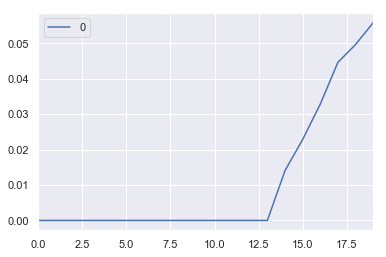

In [33]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [44]:
K = 14

model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_train, y_train)  #fit the model
error_train = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  14 is: 0.0557773351022717


In [45]:
K = 14

model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_test, y_test)  #fit the model
error_test = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  14 is: 0.0557773351022717


In [48]:
knn_train_R_sq = model.score(x_train, y_train) 
knn_test_R_sq = model.score(x_test, y_test) 

### Comparison of models 

Compare the two. How similar are they? Do they miss in different ways?

Write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.

In [52]:
data2 = {'R_sq_train':[knn_train_R_sq], 'R_sq_test':[knn_test_R_sq],
       'MAE': ['Not Available'], 'MSE': ['Not Available'], 'RMSE': [error_train],
       'MAPE': ['Not Available']} 
  
# Creates pandas DataFrame. 
model_stats_2 = pd.DataFrame(data2, index =['knn']) 
  
# print the data 
model_stats_compare.append(model_stats_2, ignore_index=False) 

,R_sq_train,R_sq_test,MAE,MSE,RMSE,MAPE
lrm,0.310733,0.032572,0.417457,0.224658,0.473981,inf
lcv,0.310729,0.033897,0.417271,0.224351,0.473657,inf
rcv,0.310729,0.033897,0.417113,0.223806,0.473082,inf
ecv,0.310729,0.033897,0.416333,0.222681,0.471890,inf
knn,0.833708,0.842232,Not Available,Not Available,0.055777,Not Available


In the previous section, I chose the ECV regression model as the best linear regression model for my dataset based on the higher R-sq values and the lower MAE, MSE, and RMSE values. Using the values available (R-sq train & test, and RMSE), the comparison to knn model is less straighforward. The knn model appears to outperform the ECV linear model with higher R-sq values for both train and test. However, the RMSE values are also higher, meaning that the chance of error is higher. 

After reading about the pros and cons of using knn vs linear regression models, it seems that in instances where the relationship between the variables and the target in non-linear, knn may prove to be the "better" choice. The advantages of knn are best seen when there are few independent variables and they tend to "behave" in a reliably predictable way (e.g. like a recipe). KNN also requires a sufficint number of observations per predictor. Other advantages of knn are that it is considered relatively easy to code

The disadvantages of using knn regression model are the issues of weight and K. If the scale of distance is not the same for each variable, it requires the investigator to scale and weight the features correctly in order to produce a successful model. Also, the knn model is considered to be slow and suffers from the "curse of dimensionality" when a large number of independent variables are present. 

In general, I would likely choose one of the linear regression models over knn for these reasons. However, in this instance, the knn model does seem to perform best. Likely due to the relatively small number of independent variables and the somewhat fixed relationship between the variables and the target. 